In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simple example - ek mathematical function ka contour fill plot
# z = sin(sqrt(x^2 + y^2)) - circular waves jaisa pattern

# Grid points generate karte hain
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Function calculate karte hain
Z = np.sin(np.sqrt(X**2 + Y**2))

# Figure banate hain with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Regular Contour Plot (sirf lines)
contour = ax1.contour(X, Y, Z, levels=15, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)  # values show karne ke liye
ax1.set_title('Regular Contour Plot')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')

# 2. Contour Fill Plot (filled colors)
contourf = ax2.contourf(X, Y, Z, levels=15, cmap='viridis')
plt.colorbar(contourf, ax=ax2)  # color scale dikhane ke liye
ax2.set_title('Contour Fill Plot')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')

plt.tight_layout()
plt.show()

# Practical example - Temperature distribution
fig, ax = plt.subplots(figsize=(8, 6))

# Imagine yeh room ka temperature data hai
# Center mein heater hai, corners mein cold
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)

# Temperature function - center (5,5) pe maximum
temp = 30 - np.sqrt((X-5)**2 + (Y-5)**2) * 3

# Contour fill plot with custom levels
levels = np.arange(10, 31, 2)  # 10°C se 30°C tak, 2 degree intervals
cf = ax.contourf(X, Y, temp, levels=levels, cmap='coolwarm')

# Contour lines bhi add kar sakte hain for clarity
cs = ax.contour(X, Y, temp, levels=levels, colors='black', linewidths=0.5, alpha=0.3)

# Colorbar with label
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label('Temperature (°C)', rotation=270, labelpad=20)

ax.set_title('Room Temperature Distribution')
ax.set_xlabel('Room Width (meters)')
ax.set_ylabel('Room Length (meters)')

plt.show()

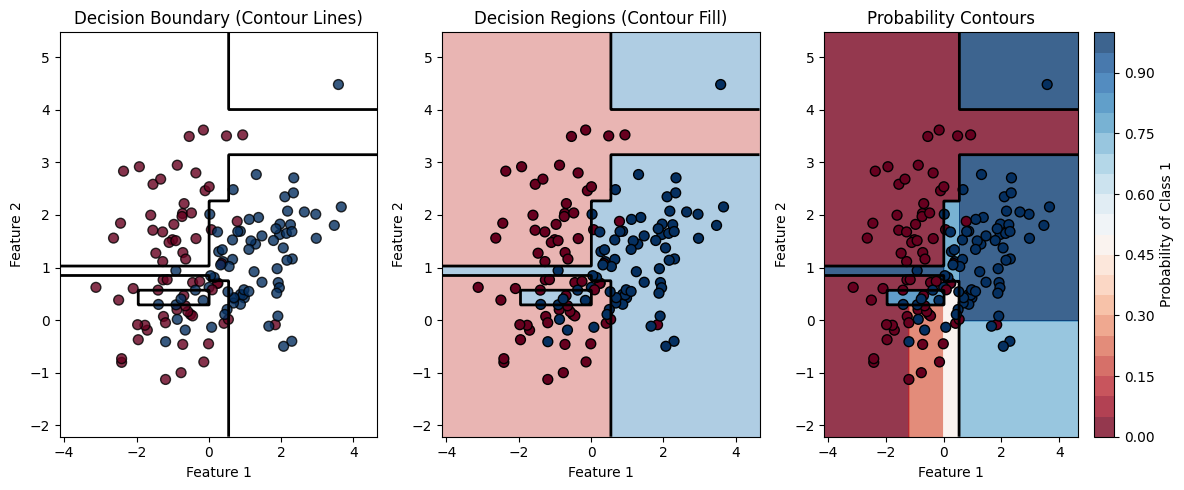

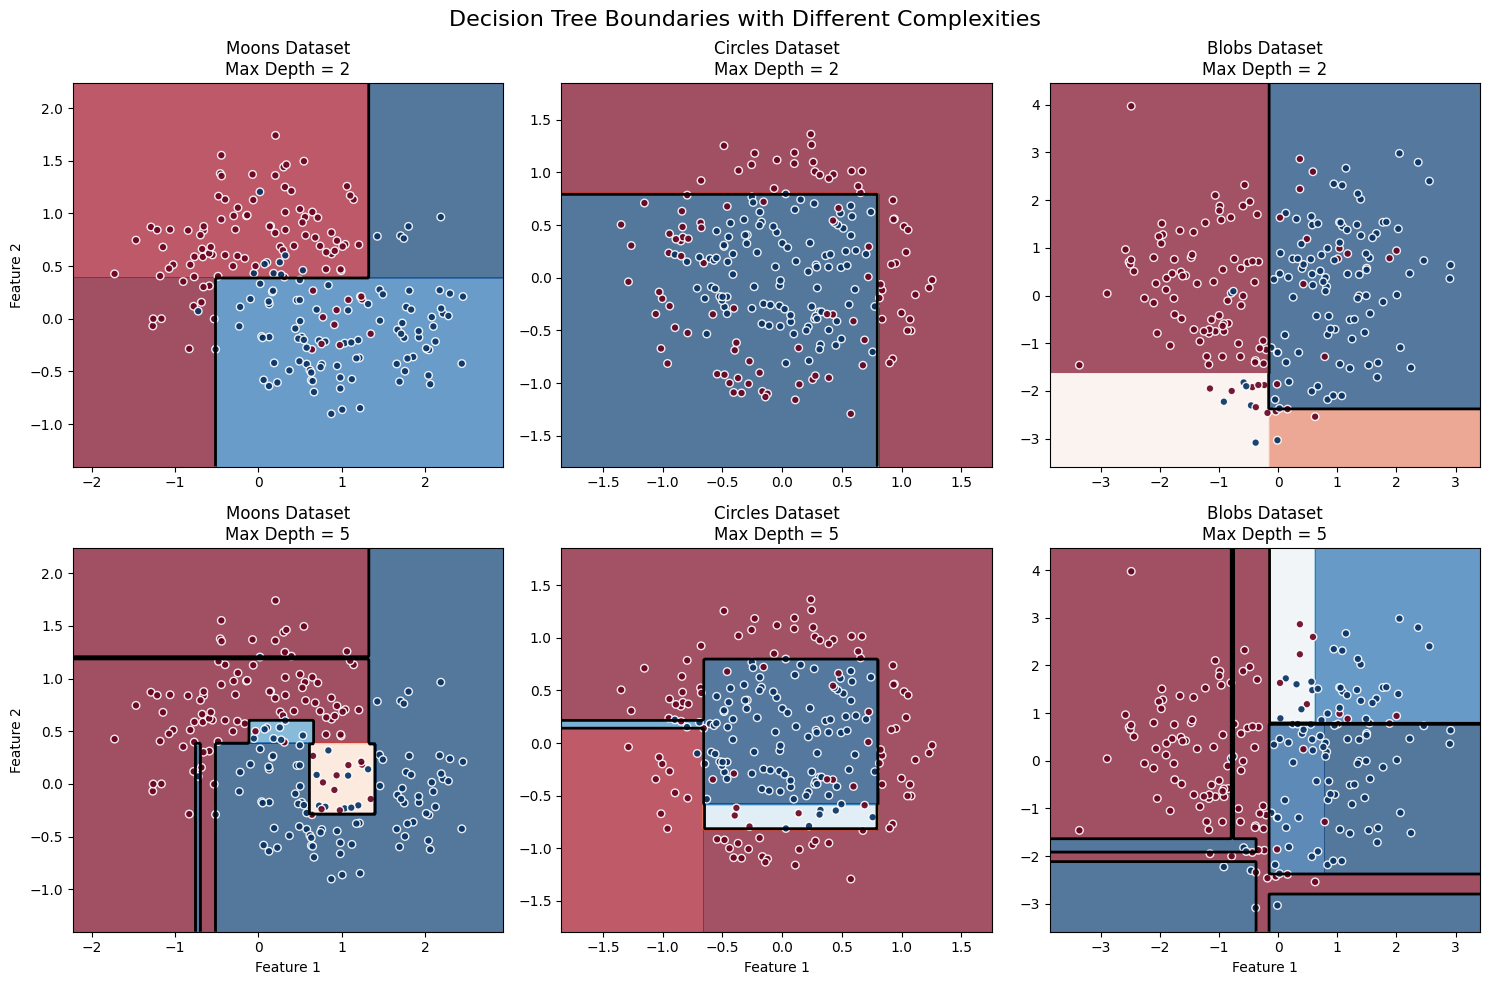

Decision Tree Boundary Visualization:
- Contour lines show exact decision boundary (50% probability)
- Color intensity shows confidence of predictions
- Deeper trees create more complex boundaries
- Notice rectangular/axis-aligned splits typical of decision trees


In [16]:
# Decision Tree Classifier Decision Boundary using Contour Plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Example 1: Simple 2-feature classification
# Dataset generate karte hain
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree model train karte hain
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

# Decision boundary plot karne ke liye mesh grid banate hain
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Har mesh point pe prediction karte hain
Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 5))

# Subplot 1: Contour plot (sirf lines)
plt.subplot(1, 3, 1)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu', 
           edgecolors='black', s=50, alpha=0.8)
plt.title('Decision Boundary (Contour Lines)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 2: Contour fill plot
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z, levels=2, alpha=0.4, cmap='RdBu')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu', 
           edgecolors='black', s=50)
plt.title('Decision Regions (Contour Fill)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 3: Probability contours (zyada detailed)
# Probability predictions for better visualization
Z_proba = dt_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_proba = Z_proba.reshape(xx.shape)

plt.subplot(1, 3, 3)
contour = plt.contourf(xx, yy, Z_proba, levels=20, cmap='RdBu', alpha=0.8)
plt.colorbar(contour, label='Probability of Class 1')
plt.contour(xx, yy, Z_proba, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu', 
           edgecolors='black', s=50)
plt.title('Probability Contours')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Example 2: Non-linear decision boundaries with different datasets
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Different datasets
datasets = [
    make_moons(n_samples=200, noise=0.3, random_state=42),
    make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42),
    make_classification(n_samples=200, n_features=2, n_redundant=0, 
                       n_informative=2, n_clusters_per_class=2, random_state=42)
]

dataset_names = ['Moons Dataset', 'Circles Dataset', 'Blobs Dataset']

for idx, (X, y) in enumerate(datasets):
    # Different max_depth values
    for depth_idx, max_depth in enumerate([2, 5]):
        ax = axes[depth_idx, idx]
        
        # Train decision tree
        dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        dt.fit(X, y)
        
        # Create mesh
        h = 0.02
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Predictions
        Z = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        
        # Contour plot
        contourf = ax.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.7)
        ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
        
        # Scatter plot
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', 
                  edgecolors='white', s=30, alpha=0.9)
        
        ax.set_title(f'{dataset_names[idx]}\nMax Depth = {max_depth}')
        ax.set_xlabel('Feature 1' if depth_idx == 1 else '')
        ax.set_ylabel('Feature 2' if idx == 0 else '')

plt.suptitle('Decision Tree Boundaries with Different Complexities', fontsize=16)
plt.tight_layout()
plt.show()

print("Decision Tree Boundary Visualization:")
print("- Contour lines show exact decision boundary (50% probability)")
print("- Color intensity shows confidence of predictions")
print("- Deeper trees create more complex boundaries")
print("- Notice rectangular/axis-aligned splits typical of decision trees")

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [20]:
df = pd.read_csv('Social_Network_Ads.csv')


In [21]:
df.sample(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
355,15606472,Male,60,34000,1
212,15707596,Female,59,42000,0
285,15734161,Female,37,93000,1
39,15782806,Female,27,31000,0
30,15581198,Male,31,74000,0
272,15791373,Male,60,42000,1
398,15755018,Male,36,33000,0
303,15637593,Male,37,79000,1
186,15724402,Female,20,82000,0
155,15610140,Female,31,15000,0


In [28]:
df.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [31]:
X = df.iloc[:,2:4].values
X[:,0].min() - 1

np.int64(17)

In [24]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

(1351, 440)
(1351, 440)
[0 0 0 ... 1 1 1]


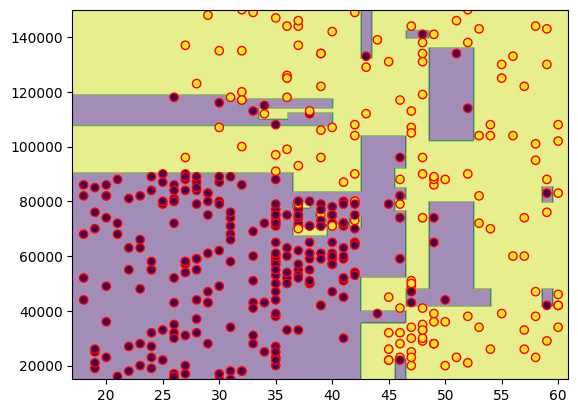

In [79]:
X = df.iloc[:,2:4].values
y= df.iloc[:,-1].values

clf = DecisionTreeClassifier()
clf.fit(X,y)

a = np.arange(start = X[:,0].min() -1,stop=X[:,0].max() +1,step = 0.1)
b = np.arange(start = X[:,1].min() -1,stop=X[:,1].max() +1,step=100)




XX,yy = np.meshgrid(a,b)
print(XX.shape)
print(yy.shape)

input_format = np.array([XX.ravel(),yy.ravel()]).T


labels = clf.predict(input_format)
print(labels)

plt.contourf(XX,yy,labels.reshape(XX.shape),alpha=0.5)
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='red')

In [36]:
b.shape

(1351,)

In [37]:
a.shape

(440,)

In [39]:
XX.shape

(1351, 440)

In [40]:
yy.shape

(1351, 440)

array([[1.70000e+01, 1.49990e+04],
       [1.71000e+01, 1.49990e+04],
       [1.72000e+01, 1.49990e+04],
       ...,
       [6.07000e+01, 1.49999e+05],
       [6.08000e+01, 1.49999e+05],
       [6.09000e+01, 1.49999e+05]])